<a href="https://colab.research.google.com/github/plaban1981/Vision_Transformer_Model/blob/main/Vision_transformer_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 2.5MB 12.4MB/s 
     |████████████████████████████████| 901kB 46.7MB/s 
     |████████████████████████████████| 3.3MB 41.3MB/s 


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image as img
from IPython.display import Image, display

In [17]:
!wget https://previews.123rf.com/images/atoss/atoss1702/atoss170200048/73451162-mango-fruit-isolated.jpg

--2021-07-17 19:02:59--  https://previews.123rf.com/images/atoss/atoss1702/atoss170200048/73451162-mango-fruit-isolated.jpg
Resolving previews.123rf.com (previews.123rf.com)... 52.222.149.15, 52.222.149.86, 52.222.149.5, ...
Connecting to previews.123rf.com (previews.123rf.com)|52.222.149.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130345 (127K) [image/jpeg]
Saving to: ‘73451162-mango-fruit-isolated.jpg’

73451162-mango-frui 100%[===================>] 127.29K   496KB/s    in 0.3s    

2021-07-17 19:03:00 (496 KB/s) - ‘73451162-mango-fruit-isolated.jpg’ saved [130345/130345]



In [18]:
file_name = "/content/73451162-mango-fruit-isolated.jpg"

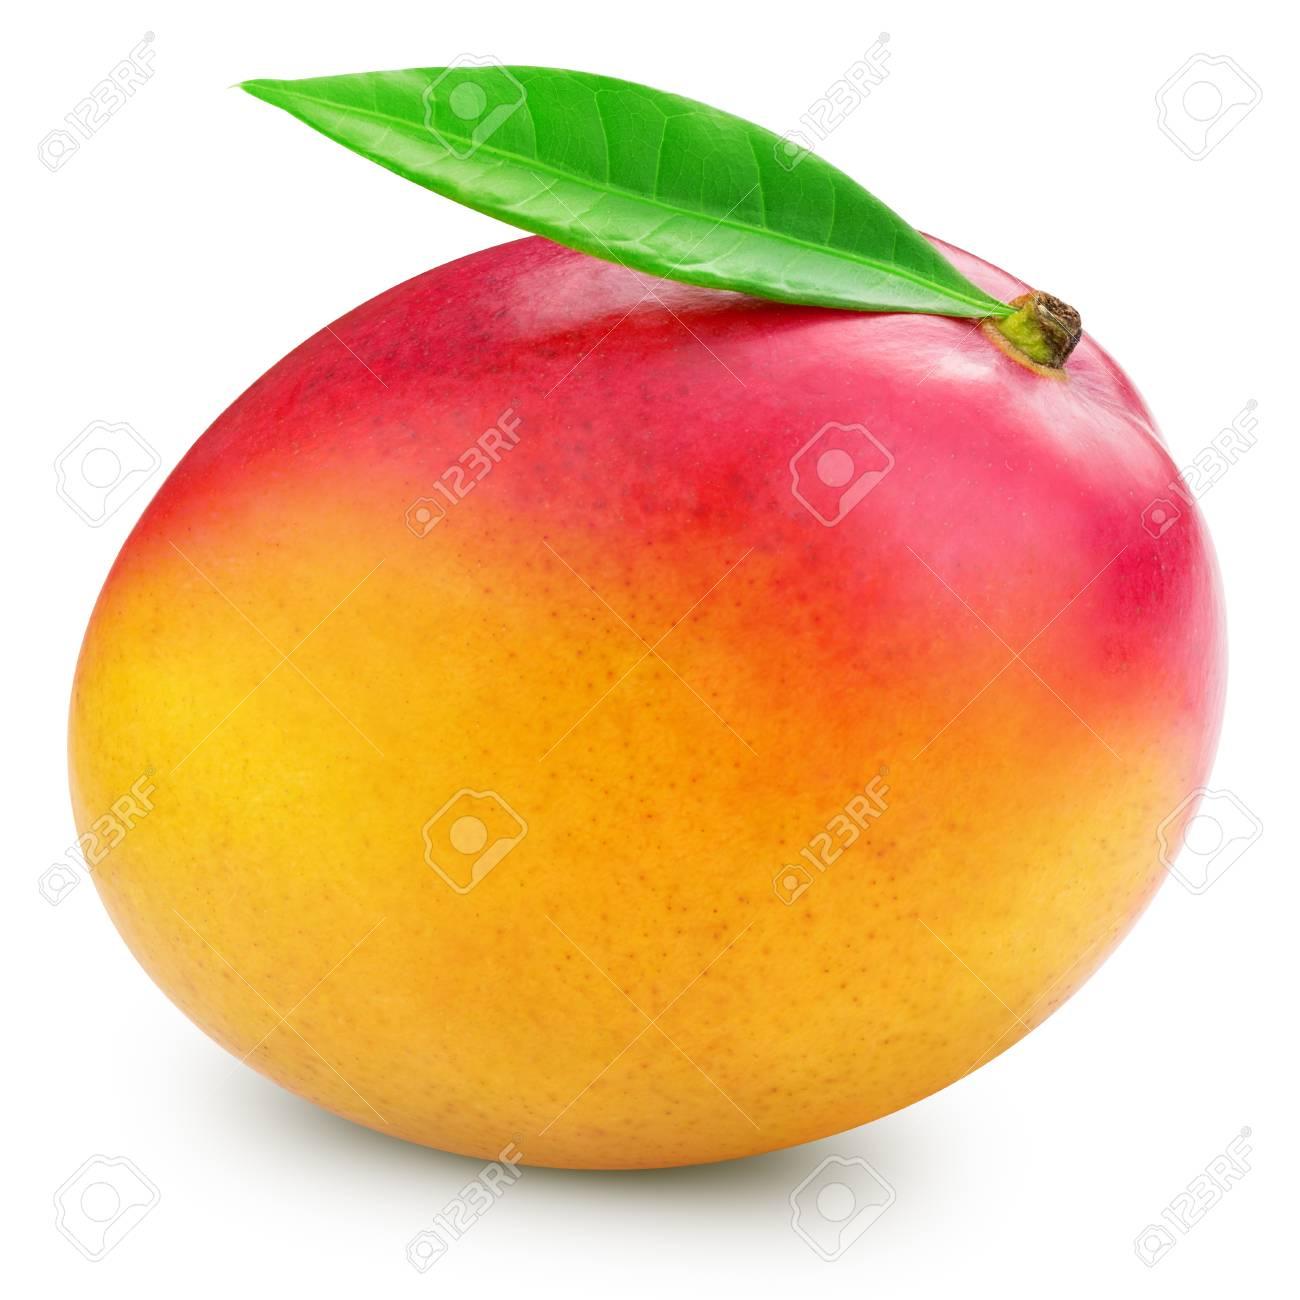

In [19]:
display(Image(file_name, width = 700, height = 400))

In [20]:
image_array = img.open('/content/73451162-mango-fruit-isolated.jpg')

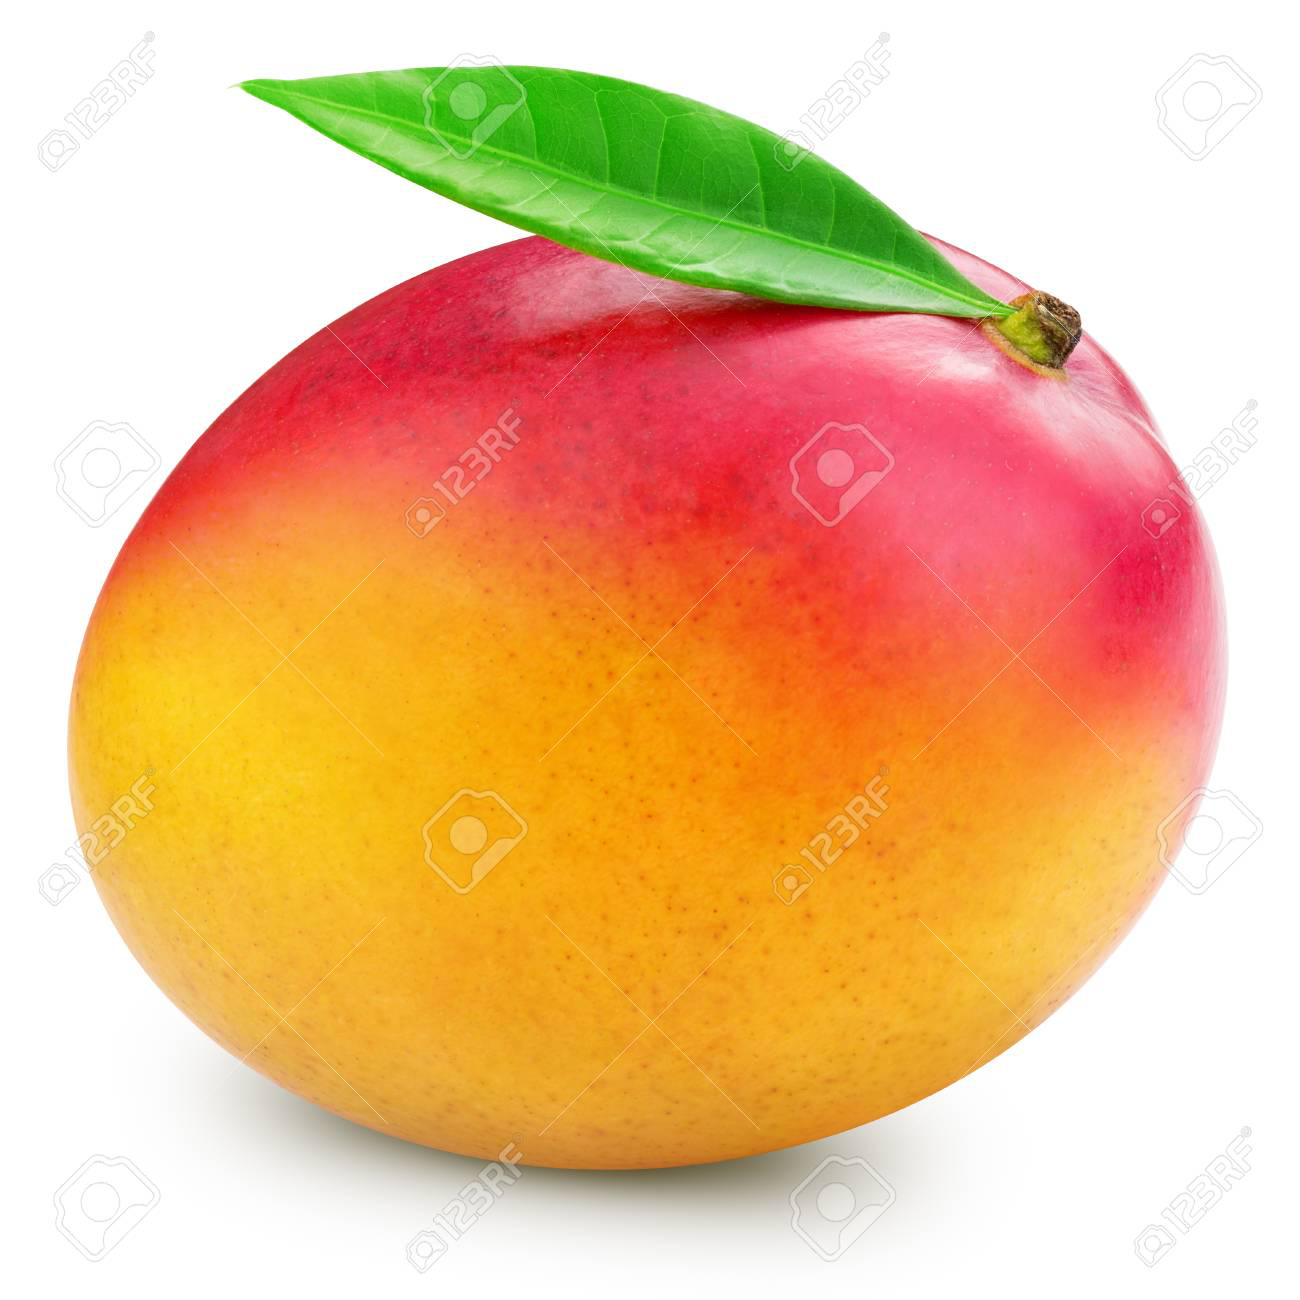

In [21]:
image_array

In [12]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

## Extract features

In [22]:
inputs = feature_extractor(images = image_array, 
                           return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

## Make Predictions

In [23]:
predicted_class_idx = logits.argmax(-1).item()
print(predicted_class_idx)

950


In [24]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: orange
